<a href="https://colab.research.google.com/github/Anuragroychowdhury12/global-temp-internship-project/blob/main/Copy_of_Visualizing_Time_Series_Dataset_Global_Temp_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

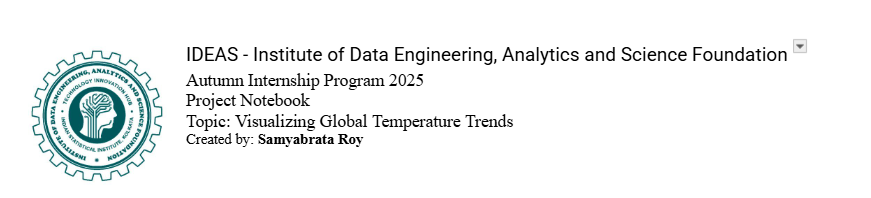

# Notebook: 3

👋 Welcome students!

In this journey, we’re going to take a dataset and slowly uncover the story it tells through visualization. Numbers by themselves can feel cold and endless, but once we turn them into visuals, they begin to speak.


---




---

## 📝 Before We Dive In...

Before we start digging deep into the dataset, let’s pause for a moment and reflect.  
Here are a couple of questions for you to think about (and maybe discuss!):

1. **What do you understand by *Time-Series Data*?**  
   *(Hint: Think about data that is recorded over time — like daily sales data.)*

2. **Do you think choosing Python as our programming language for this analysis is a good decision?**  
   Feel free to share your honest opinion — there’s no right or wrong answer here!  

---

#Introduction



## ⚙️ Setting Things Up

Before we begin our analysis, we need to make sure we have the right tools.  
In the next coding cell, we’ll install and import the required Python packages that will help us explore and visualize the COVID-19 dataset.  


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from datetime import datetime

---

## 📂 Loading Our Dataset

Now that our setup is ready, it’s time to bring in the data we’ll be working with.  
In the next coding cell, we’ll load the COVID-19 dataset directly from **Google Drive** (shared with public view access).  

Once the file is loaded, we’ll **print the first few rows** so that we can get a quick look at what the dataset contains before moving into analysis and visualization.  



In [ ]:
# Replace with your Google Drive file ID which has public view access
file_id = "1kRogzVjnT_2qcjLd0x8jHFmWsq1Ek9NB"

# Construct the download URL
url = f"https://drive.google.com/uc?export=download&id={file_id}"

try:
    # Read CSV directly into pandas
    df_temp = pd.read_csv(url)
    print(df_temp.head())
except Exception as e:
    print("Error loading data:", e)


    Source        Date    Mean
0     GCAG  2016-12-06  0.7895
1  GISTEMP  2016-12-06  0.8100
2     GCAG  2016-11-06  0.7504
3  GISTEMP  2016-11-06  0.9300
4     GCAG  2016-10-06  0.7292


* To get more info about metadata of the dataset refer to README file in the root of this notebook directory

##Task:

What if the dataset was not available in any only repo or not hosted anywhere? How can you upload a dataset from your local machine? Code it

In [ ]:
from google.colab import files
import pandas as pd

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  # To read the uploaded file into a pandas DataFrame:
  # Assuming it's a CSV file
  df_uploaded = pd.read_csv(fn)
  print(df_uploaded.head())

Saving monthly_csv (1).csv to monthly_csv (1).csv
User uploaded file "monthly_csv (1).csv" with length 78893 bytes
    Source        Date    Mean
0     GCAG  2016-12-06  0.7895
1  GISTEMP  2016-12-06  0.8100
2     GCAG  2016-11-06  0.7504
3  GISTEMP  2016-11-06  0.9300
4     GCAG  2016-10-06  0.7292




---


## EDA including visualization

### Plot 1:

Monthly Revenue Over Time  

Visualizing monthly avg temparature obtaining from 2 different sources, which will help helps us understand trends across the years.  
Are there peaks during certain months (like due to any particular season)? Let’s find out.

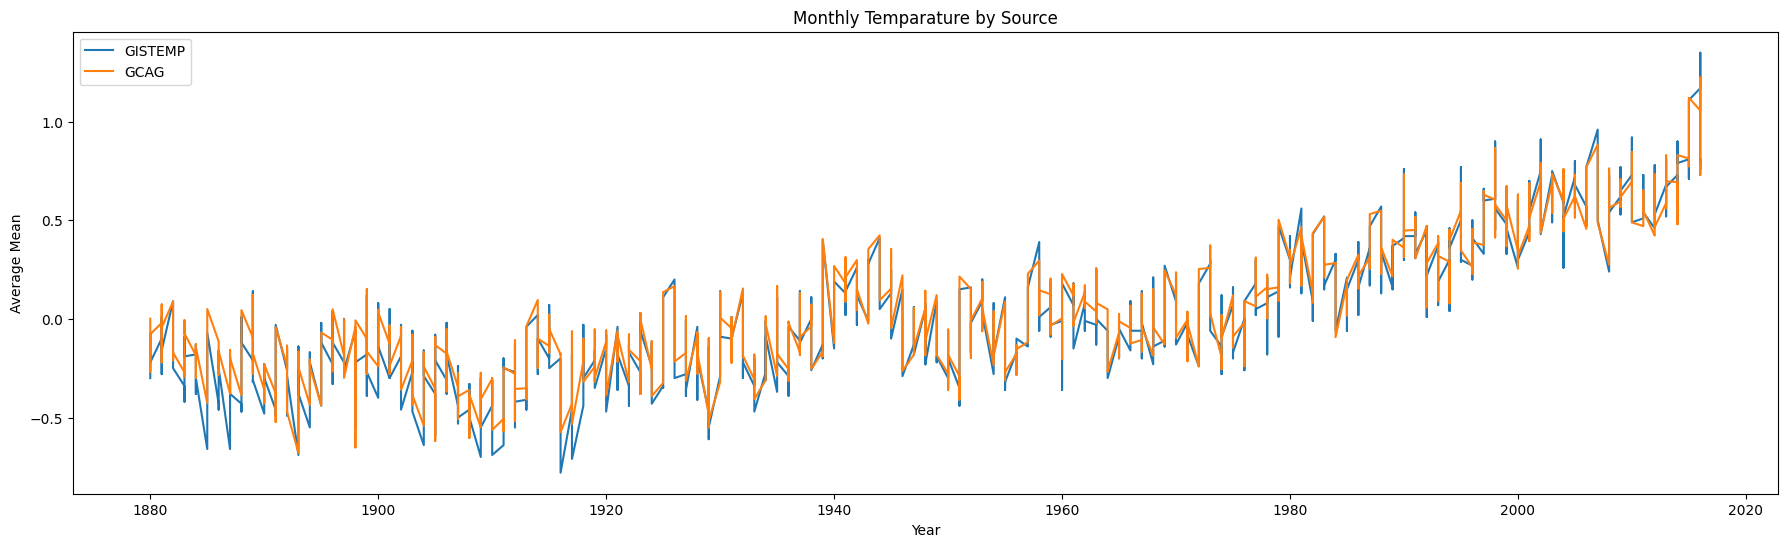

In [ ]:
import matplotlib.pyplot as plt

# Convert Date column to datetime
df_temp['Date'] = pd.to_datetime(df_temp['Date'])

# Plot line chart
plt.figure(figsize=(22,6))
for source in df_temp['Source'].unique():
    subset = df_temp[df_temp['Source'] == source]
    plt.plot(subset['Year'], subset['Mean'], label=source)

plt.title("Monthly Temparature increase by Source")
plt.xlabel("Year")
plt.ylabel("Average Mean")
plt.legend()
plt.grid(True, linestyle="--", alpha=0)
plt.show()




---



### Plot 2:

12 Months Moving Average

Smoothing out seasonal fluctuations and short-term variations to reveal the underlying long-term temperature trends. The 12-month moving average provides a clearer view of climate patterns by averaging each month with the 11 months surrounding it, making it easier to identify gradual warming or cooling trends over the years.

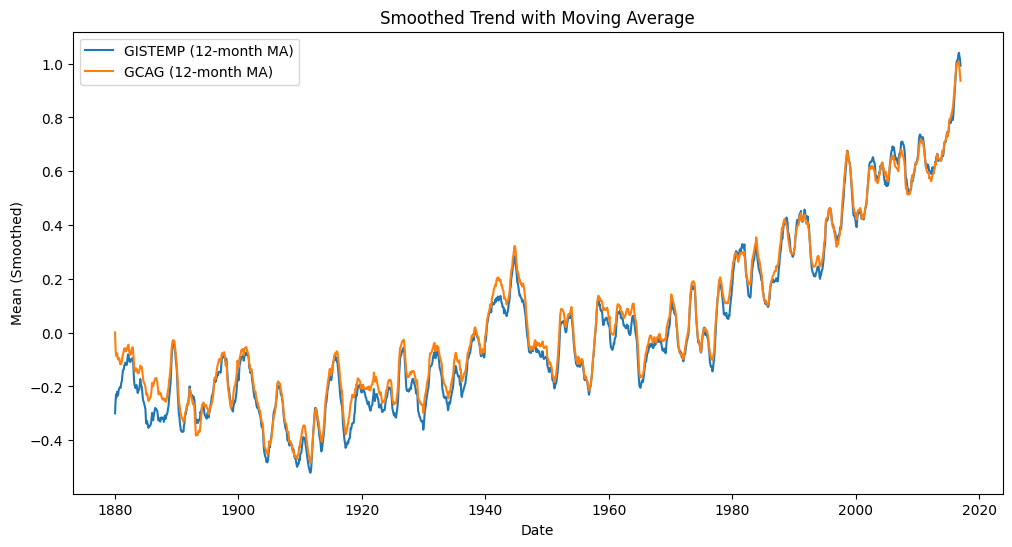

In [ ]:
# Sort data by Date
df_temp = df_temp.sort_values(by="Date")

# Calculate moving average (e.g., 12-month window)
df_temp['Moving_Avg'] = df_temp.groupby('Source')['Mean'].transform(lambda x: x.rolling(window=12, min_periods=1).mean())

# Plot moving average
plt.figure(figsize=(12,6))
for source in df_temp['Source'].unique():
    subset = df_temp[df_temp['Source'] == source]
    plt.plot(subset['Date'], subset['Moving_Avg'], label=f"{source} (12-month MA)")

plt.title("Smoothed Trend with Moving Average")
plt.xlabel("Date")
plt.ylabel("Mean (Smoothed)")
plt.legend()
plt.show()


Q. How would you interpet this?

The code sorts a DataFrame by date, it computes a 12-months of average of Mean values grouped by Source to smooth trends, and plots.
This moving average reduces noise, revealing long-term patterns like upward or downward trends in the data.
The plot allows comparison of smoothed "Mean" evolutions across sources, though it starts with fewer points early on and doesn't predict future values.




Construct another line plot by taking any one of the souces in count and try to smooth-out the variation more and try to come up with a trend

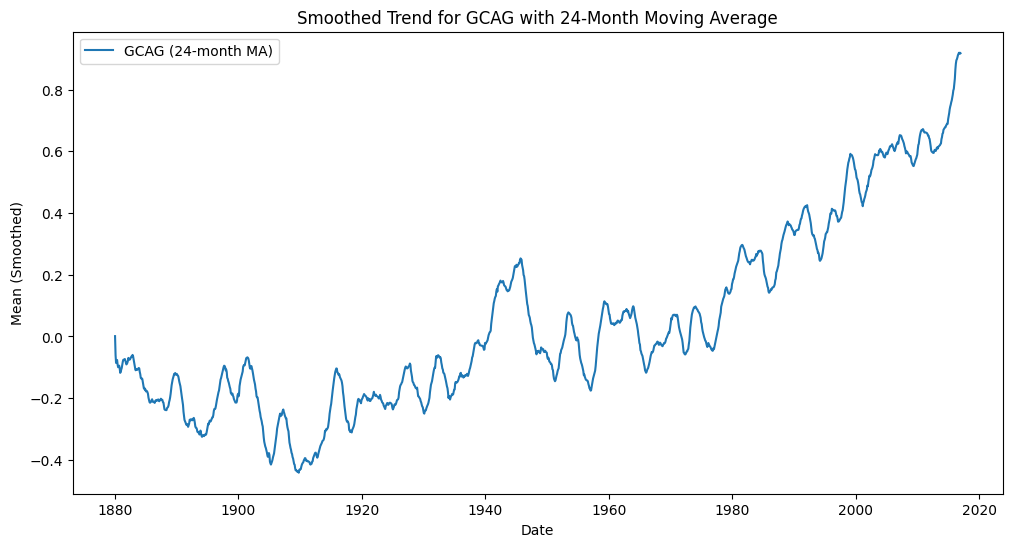

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
file_path = "/content/monthly_csv (1).csv"
df_temp = pd.read_csv(file_path)

# Convert Date column to datetime
df_temp['Date'] = pd.to_datetime(df_temp['Date'])

# Sort data by Date
df_temp = df_temp.sort_values(by="Date")

# Select one source (e.g., 'GCAG')
source_to_plot = 'GCAG'
df_subset = df_temp[df_temp['Source'] == source_to_plot].copy()

# Calculate a longer moving average (e.g., 24-month window for more smoothing)
df_subset['Moving_Avg_24'] = df_subset['Mean'].rolling(window=24, min_periods=1).mean()

# Plot the new moving average
plt.figure(figsize=(12,6))
plt.plot(df_subset['Date'], df_subset['Moving_Avg_24'], label=f"{source_to_plot} (24-month MA)")

plt.title(f"Smoothed Trend for {source_to_plot} with 24-Month Moving Average")
plt.xlabel("Date")
plt.ylabel("Mean (Smoothed)")
plt.legend()
plt.show()




---


### Plot 3

Seasonal Temperature Heatmap (Last 50 Years)

A comprehensive heatmap displaying temperature variations across months and years over the past five decades. This visualization reveals seasonal patterns, climate shifts, and anomalies by showing how temperatures have changed month-by-month across different years. Warmer periods appear as lighter/warmer colors while cooler periods show as darker/cooler colors, making it easy to spot seasonal consistency, unusual weather events, and long-term climate trends.

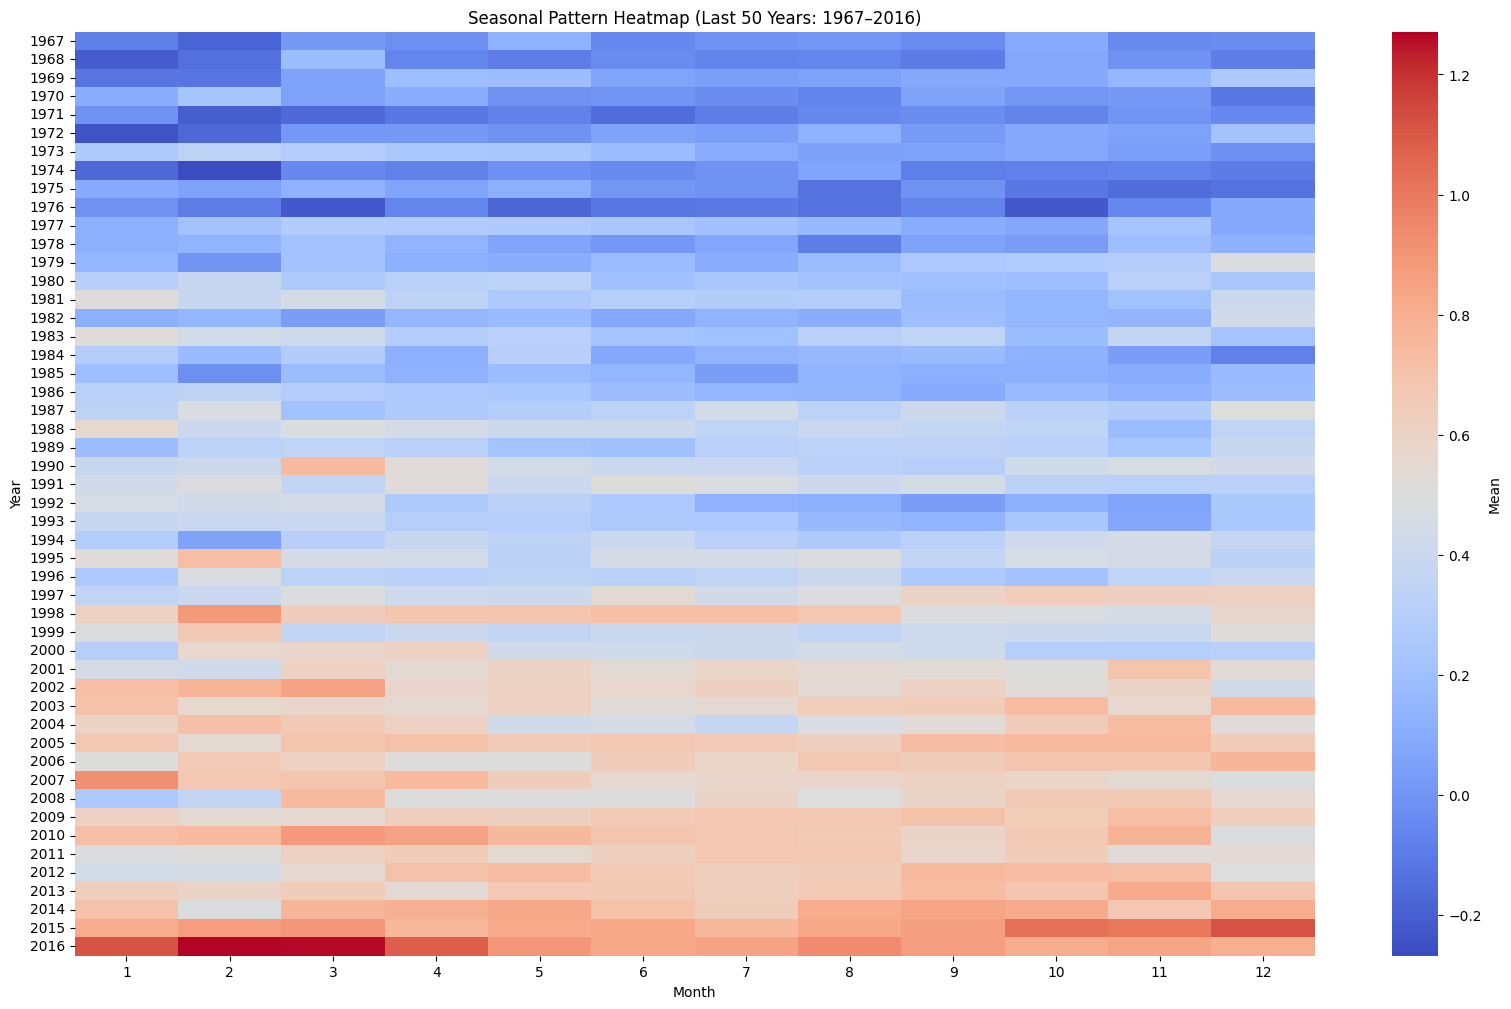

In [ ]:
# Extract Year and Month
df_temp['Year'] = df_temp['Date'].dt.year
df_temp['Month'] = df_temp['Date'].dt.month

# Filter last 50 years
latest_year = df_temp['Year'].max()
df_last50 = df_temp[df_temp['Year'] >= latest_year - 49]

# Group by Year and Month (average across sources if needed)
seasonal_data = df_last50.groupby(['Year','Month'])['Mean'].mean().reset_index()

# Pivot for heatmap
heatmap_data = seasonal_data.pivot(index='Year', columns='Month', values='Mean')

# Plot heatmap
plt.figure(figsize=(20,12))
sns.heatmap(heatmap_data, cmap="coolwarm", annot=False, cbar_kws={'label': 'Mean'})
plt.title(f"Seasonal Pattern Heatmap (Last 50 Years: {latest_year-49}–{latest_year})")
plt.xlabel("Month")
plt.ylabel("Year")
plt.show()


Q. How about we try to visualize last 20 years rather? Construct the plot

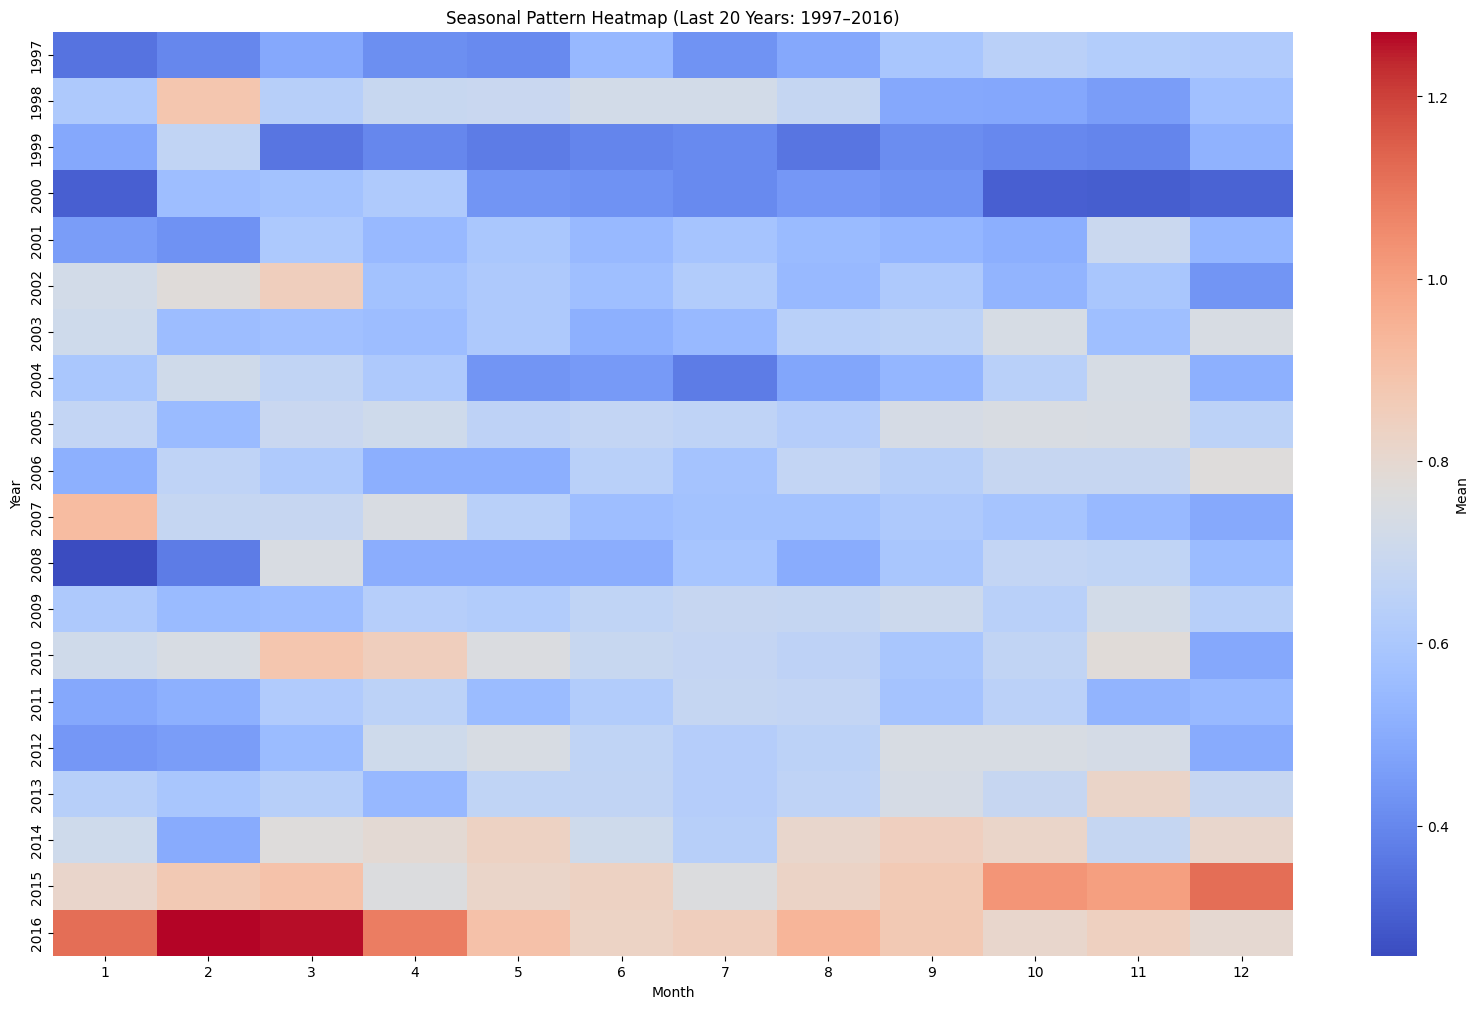

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
file_path = "/content/monthly_csv (1) (1).csv"
df_temp = pd.read_csv(file_path)

# Convert Date column to datetime
df_temp['Date'] = pd.to_datetime(df_temp['Date'])

# Extract Year and Month
df_temp['Year'] = df_temp['Date'].dt.year
df_temp['Month'] = df_temp['Date'].dt.month

# Filter last 20 years
latest_year = df_temp['Year'].max()
df_last20 = df_temp[df_temp['Year'] >= latest_year - 19]

# Group by Year and Month (average across sources if needed)
seasonal_data = df_last20.groupby(['Year','Month'])['Mean'].mean().reset_index()

# Pivot for heatmap
heatmap_data = seasonal_data.pivot(index='Year', columns='Month', values='Mean')

# Plot heatmap
plt.figure(figsize=(20,12))
sns.heatmap(heatmap_data, cmap="coolwarm", annot=False, cbar_kws={'label': 'Mean'})
plt.title(f"Seasonal Pattern Heatmap (Last 20 Years: {latest_year-19}–{latest_year})")
plt.xlabel("Month")
plt.ylabel("Year")
plt.show()



---

Task:

What type of charts could have served the same purpose done in plot 3? Plot any one of them (apart from heatmap) and visualize seasonal variation

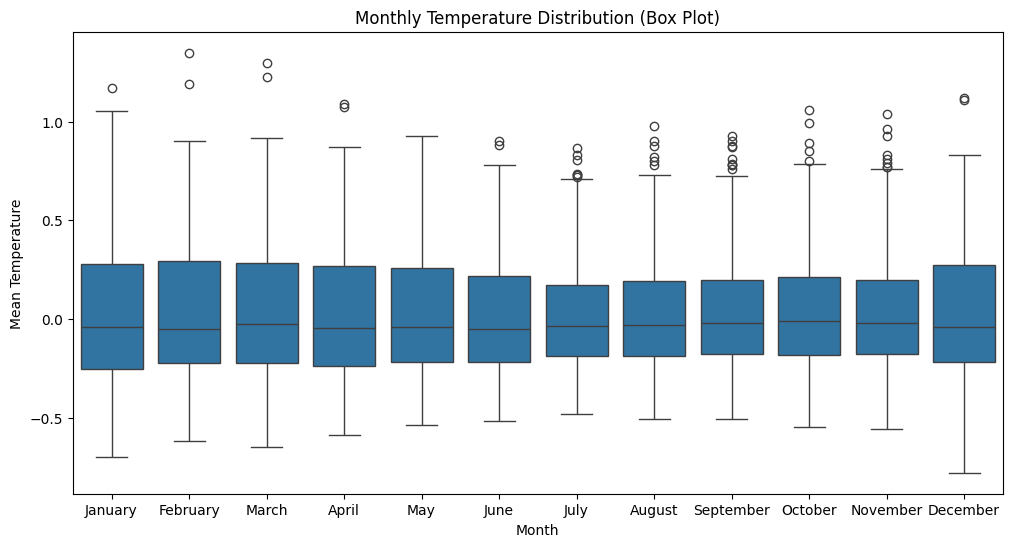

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
file_path = "/content/monthly_csv (1).csv"
df_temp = pd.read_csv(file_path)

# Convert Date column to datetime
df_temp['Date'] = pd.to_datetime(df_temp['Date'])

# Extract Month name for better plotting
df_temp['Month_Name'] = df_temp['Date'].dt.strftime('%B')

# Define the order of months for plotting
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

# Create a box plot of mean temperature by month
plt.figure(figsize=(12, 6))
sns.boxplot(x='Month_Name', y='Mean', data=df_temp, order=month_order)
plt.title('Monthly Temperature Distribution (Box Plot)')
plt.xlabel('Month')
plt.ylabel('Mean Temperature')
plt.show()



---



### Assignment:

Find a similar dataset from any public repository or constrt a synthetic data from `www.syngendata.ai` and perform similart analysis to draw inference

Synthetic data about Global Temperature:

Region,Country,City,Latitude,Longitude,Year,Month,AvgTemperatureC,TemperatureChangeC,MeasurementMethod
North America,USA,New York,40.7128,-74.0060,2024,1,1.1,0.3,Satellite
Europe,UK,London,51.5074,-0.1278,2024,1,3.2,0.4,Ground Station
Asia,India,Delhi,28.6139,77.2090,2024,1,13.2,0.2,Satellite
Africa,Nigeria,Lagos,6.5244,3.3792,2024,1,27.8,0.5,Ground Station
South America,Brazil,Rio de Janeiro,-22.9068,-43.1729,2024,1,26.7,0.6,Satellite
Oceania,Australia,Sydney,-33.8688,151.2093,2024,1,22.4,0.3,Ground Station
Antarctica,Antarctica,McMurdo Station,-77.8419,166.6863,2024,1,-26.4,0.7,Satellite
Europe,Germany,Berlin,52.5200,13.4050,2024,2,2.8,0.2,Ground Station
Asia,China,Beijing,39.9042,116.4074,2024,2,5.9,0.3,Satellite
North America,Canada,Toronto,43.6532,-79.3832,2024,2,-1.7,0.2,Ground Station
Africa,South Africa,Cape Town,-33.9249,18.4241,2024,2,19.1,0.4,Satellite
South America,Argentina,Buenos Aires,-34.6037,-58.3816,2024,2,25.2,0.5,Ground Station
Oceania,New Zealand,Auckland,-36.8485,174.7633,2024,2,20.3,0.3,Satellite
Europe,France,Paris,48.8566,2.3522,2024,3,8.1,0.3,Ground Station
Asia,Japan,Tokyo,35.6895,139.6917,2024,3,9.7,0.4,Satellite
North America,Mexico,Mexico City,19.4326,-99.1332,2024,3,16.8,0.5,Ground Station
Africa,Egypt,Cairo,30.0444,31.2357,2024,3,19.5,0.4,Satellite
South America,Chile,Santiago,-33.4489,-70.6693,2024,3,18.4,0.3,Ground Station
Oceania,Fiji,Suva,-18.1248,178.4501,2024,3,28.1,0.7,Satellite
Europe,Spain,Madrid,40.4168,-3.7038,2024,4,12.5,0.3,Ground Station
Asia,South Korea,Seoul,37.5665,126.9780,2024,4,14.2,0.4,Satellite
North America,USA,Chicago,41.8781,-87.6298,2024,4,7.2,0.2,Ground Station
Africa,Kenya,Nairobi,-1.2921,36.8219,2024,4,21.7,0.3,Satellite
South America,Colombia,Bogota,4.7110,-74.0721,2024,4,15.3,0.4,Ground Station
Oceania,Papua New Guinea,Port Moresby,-9.4438,147.1803,2024,4,27.6,0.9,Satellite
Europe,Italy,Rome,41.9028,12.4964,2024,5,17.8,0.4,Ground Station
Asia,Thailand,Bangkok,13.7563,100.5018,2024,5,30.2,0.6,Satellite
North America,USA,Los Angeles,34.0522,-118.2437,2024,5,17.0,0.3,Ground Station
Africa,Morocco,Casablanca,33.5731,-7.5898,2024,5,20.9,0.2,Satellite
South America,Peru,Lima,-12.0464,-77.0428,2024,5,18.1,0.4,Ground Station
Oceania,Solomon Islands,Honiara,-9.4456,159.9729,2024,5,29.3,0.7,Satellite
Europe,Russia,Moscow,55.7558,37.6173,2024,6,15.4,0.4,Ground Station
Asia,Turkey,Istanbul,41.0082,28.9784,2024,6,23.7,0.6,Satellite
North America,Canada,Montreal,45.5017,-73.5673,2024,6,11.5,0.3,Ground Station
Africa,Ghana,Accra,5.6037,-0.1870,2024,6,28.7,0.8,Satellite
South America,Venezuela,Caracas,10.4806,-66.9036,2024,6,25.5,0.5,Ground Station
Oceania,Samoa,Apia,-13.8507,-171.7514,2024,6,28.8,0.7,Satellite
Europe,Sweden,Stockholm,59.3293,18.0686,2024,7,17.3,0.5,Ground Station
Asia,Indonesia,Jakarta,-6.2088,106.8456,2024,7,28.1,0.6,Satellite
North America,USA,San Francisco,37.7749,-122.4194,2024,7,16.8,0.2,Ground Station
Africa,Algeria,Algiers,36.7538,3.0588,2024,7,27.4,0.6,Satellite
South America,Ecuador,Quito,-0.1807,-78.4678,2024,7,14.2,0.3,Ground Station
Oceania,Tonga,Nuku'alofa,-21.1393,-175.2044,2024,7,27.6,0.7,Satellite
Europe,Norway,Oslo,59.9139,10.7522,2024,8,15.6,0.4,Ground Station
Asia,Saudi Arabia,Riyadh,24.7136,46.6753,2024,8,39.2,0.9,Satellite
North America,USA,Dallas,32.7767,-96.7970,2024,8,30.6,0.6,Ground Station
Africa,Ethiopia,Addis Ababa,9.0301,38.7494,2024,8,18.7,0.4,Satellite
South America,Uruguay,Montevideo,-34.9011,-56.1645,2024,8,11.9,0.2,Ground Station
Oceania,Australia,Perth,-31.9505,115.8605,2024,8,17.1,0.4,Satellite
Europe,Netherlands,Amsterdam,52.3676,4.9041,2024,9,14.7,0.3,Ground Station
Asia,Malaysia,Kuala Lumpur,3.1390,101.6869,2024,9,28.8,0.5,Satellite
North America,USA,Miami,25.7617,-80.1918,2024,9,30.7,0.7,Ground Station
Africa,Uganda,Kampala,0.3476,32.5825,2024,9,22.1,0.6,Satellite
South America,Paraguay,Asuncion,-25.2637,-57.5759,2024,9,22.3,0.4,Ground Station
Oceania,Australia,Brisbane,-27.4698,153.0251,2024,9,20.6,0.5,Satellite
Europe,Poland,Warsaw,52.2297,21.0122,2024,10,9.8,0.2,Ground Station
Asia,Pakistan,Karachi,24.8607,67.0011,2024,10,28.1,0.5,Satellite
North America,Canada,Vancouver,49.2827,-123.1207,2024,10,11.3,0.3,Ground Station
Africa,Tanzania,Dar es Salaam,-6.7924,39.2083,2024,10,25.6,0.7,Satellite
South America,Bolivia,La Paz,-16.5000,-68.1500,2024,10,12.5,0.4,Ground Station
Oceania,New Zealand,Wellington,-41.2865,174.7762,2024,10,15.7,0.3,Satellite
Europe,Switzerland,Zurich,47.3769,8.5417,2024,11,7.1,0.2,Ground Station
Asia,Philippines,Manila,14.5995,120.9842,2024,11,27.7,0.6,Satellite
North America,USA,Seattle,47.6062,-122.3321,2024,11,8.3,0.3,Ground Station
Africa,Angola,Luanda,-8.8390,13.2894,2024,11,28.5,0.8,Satellite
South America,Suriname,Paramaribo,5.8520,-55.2038,2024,11,28.2,0.7,Ground Station
Oceania,Vanuatu,Port Vila,-17.7333,168.3273,2024,11,27.9,0.6,Satellite
Europe,Austria,Vienna,48.2082,16.3738,2024,12,2.7,0.2,Ground Station
Asia,Bangladesh,Dhaka,23.8103,90.4125,2024,12,18.8,0.3,Satellite
North America,USA,Denver,39.7392,-104.9903,2024,12,-1.2,0.2,Ground Station
Africa,Mali,Bamako,12.6392,-8.0029,2024,12,26.4,0.5,Satellite
South America,Guyana,Georgetown,6.8013,-58.1551,2024,12,27.3,0.6,Ground Station
Oceania,Australia,Melbourne,-37.8136,144.9631,2024,12,20.8,0.4,Satellite
Europe,Finland,Helsinki,60.1699,24.9384,2024,1,-3.2,0.3,Ground Station
Asia,Kazakhstan,Almaty,43.2220,76.8512,2024,2,-5.8,0.2,Satellite
North America,USA,Houston,29.7604,-95.3698,2024,3,20.3,0.6,Ground Station
Africa,Zambia,Lusaka,-15.3875,28.3228,2024,4,22.7,0.4,Satellite
South America,Chile,Valparaiso,-33.0472,-71.6127,2024,5,16.3,0.3,Ground Station
Oceania,Australia,Adelaide,-34.9285,138.6007,2024,6,15.9,0.3,Satellite
Europe,Denmark,Copenhagen,55.6761,12.5683,2024,7,16.7,0.3,Ground Station
Asia,Sri Lanka,Colombo,6.9271,79.8612,2024,8,27.4,0.7,Satellite
North America,USA,Boston,42.3601,-71.0589,2024,9,17.6,0.5,Ground Station
Africa,Senegal,Dakar,14.7167,-17.4677,2024,10,28.1,0.8,Satellite
South America,Brazil,Sao Paulo,-23.5505,-46.6333,2024,11,23.5,0.5,Ground Station
Oceania,Australia,Darwin,-12.4634,130.8456,2024,12,32.3,0.9,Satellite
Europe,Belgium,Brussels,50.8503,4.3517,2024,1,5.2,0.2,Ground Station
Asia,Uzbekistan,Tashkent,41.2995,69.2401,2024,2,2.3,0.3,Satellite
North America,USA,Atlanta,33.7490,-84.3880,2024,3,15.9,0.4,Ground Station
Africa,Botswana,Gaborone,-24.6282,25.9231,2024,4,25.4,0.5,Satellite
South America,Peru,Arequipa,-16.4090,-71.5375,2024,5,18.7,0.4,Ground Station
Oceania,New Zealand,Christchurch,-43.5321,172.6362,2024,6,8.2,0.3,Satellite

<>:17: SyntaxWarning: invalid escape sequence '\d'
<>:33: SyntaxWarning: invalid escape sequence '\d'
<>:17: SyntaxWarning: invalid escape sequence '\d'
<>:33: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-3667302643.py:17: SyntaxWarning: invalid escape sequence '\d'
  plt.ylabel('Average Temperature Change ($\degree$C)')
/tmp/ipython-input-3667302643.py:33: SyntaxWarning: invalid escape sequence '\d'
  plt.ylabel('Average Temperature ($\degree$C)')


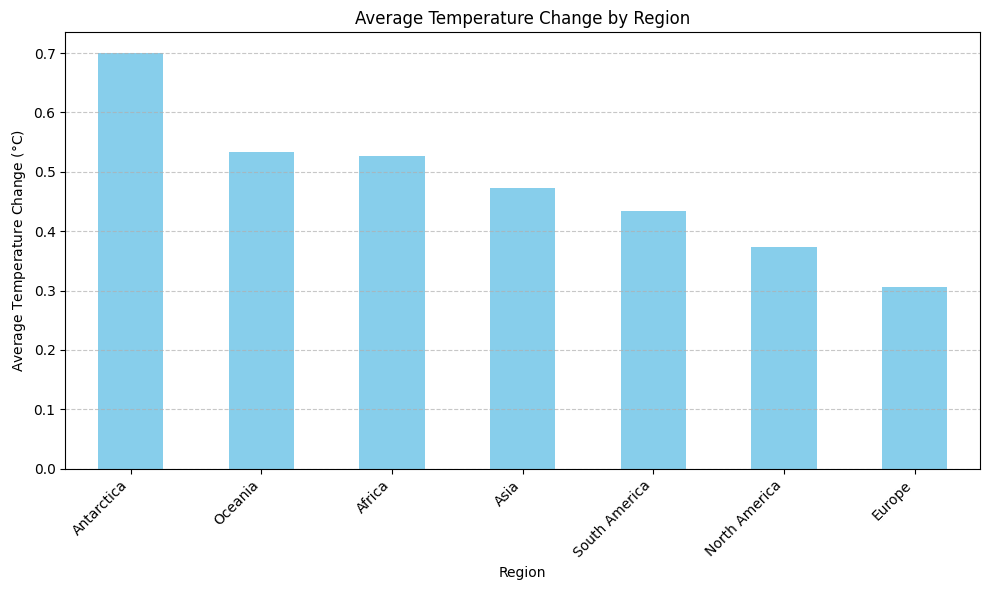

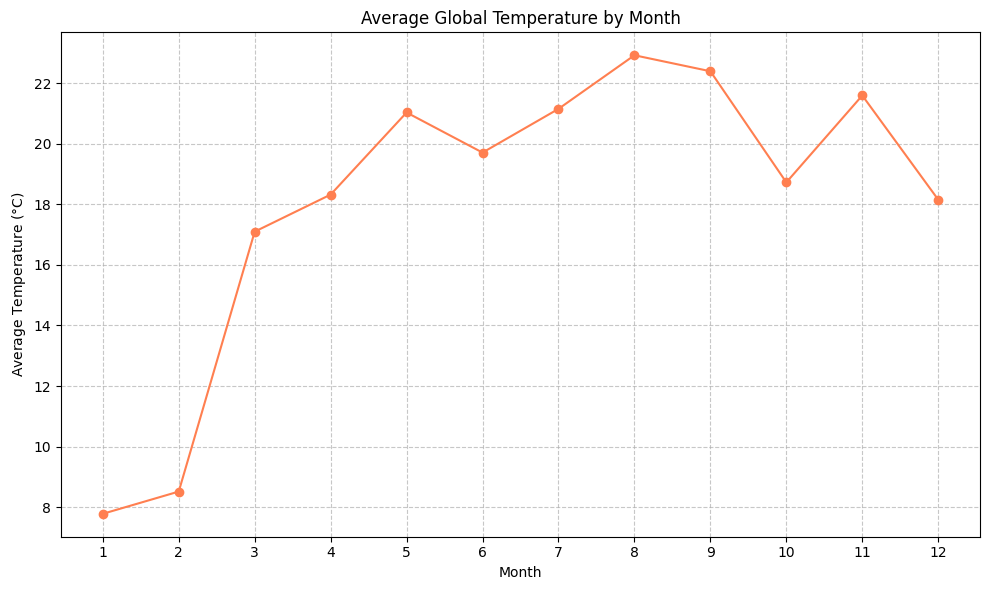

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('global_temperature_changes (1).csv')

# --- Bar Chart: Average Temperature Change by Region ---

# Calculate the average temperature change by region and sort
avg_temp_change_by_region = df.groupby('Region')['TemperatureChangeC'].mean().sort_values(ascending=False)

# Create the bar plot
plt.figure(figsize=(10, 6))
avg_temp_change_by_region.plot(kind='bar', color='skyblue')
plt.title('Average Temperature Change by Region')
plt.xlabel('Region')
plt.ylabel('Average Temperature Change ($\degree$C)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('avg_temp_change_by_region.png')

# --- Line Graph: Average Global Temperature by Month ---

# Calculate the average temperature by month
avg_temp_by_month = df.groupby('Month')['AvgTemperatureC'].mean()

# Create the line plot
plt.figure(figsize=(10, 6))
avg_temp_by_month.plot(kind='line', marker='o', linestyle='-', color='coral')
plt.title('Average Global Temperature by Month')
plt.xlabel('Month')
plt.ylabel('Average Temperature ($\degree$C)')
plt.xticks(ticks=avg_temp_by_month.index)
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('avg_temp_by_month.png')